<a href="https://colab.research.google.com/github/felippe-ribeiro/AulasIAFIAP/blob/main/Fund_ML_Aula_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Modelo Regressão Linear
Sua tarefa é prever os valores médios das casas nos distritos da Califórnia, considerando uma série de características desses distritos.



#Importando dados

In [65]:
import pandas as pd

In [66]:
dataset = pd.read_csv('housing.csv')

In [67]:
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#Configurações
Primeiro, vamos garantir que este notebook funcione bem em python 2 e 3, importar alguns módulos comuns, garantir que o MatplotLib plote figuras em linha.

In [68]:
import numpy as np
np.random.seed(42)
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


#Conhecendo os dados

In [69]:
dataset.shape

(20640, 10)

In [70]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Opa! Observe aqui que total_bedrooms possui 20433 linhas de informações preenchidas (não nulos). Isso significa que 207 bairros não possuem características.
A única variável do tipo texto é "ocean_proximity". Vamos analisar quantas categorias existem e quantos bairros pertencem a essas categorias utilizando a função value_counts()?

In [71]:
set(dataset['ocean_proximity'])

{'<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'}

In [72]:
dataset['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


Agora vamos analisar os dados do tipo numérico com a função describe():



In [73]:
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Analisando distribuição com histogramas

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

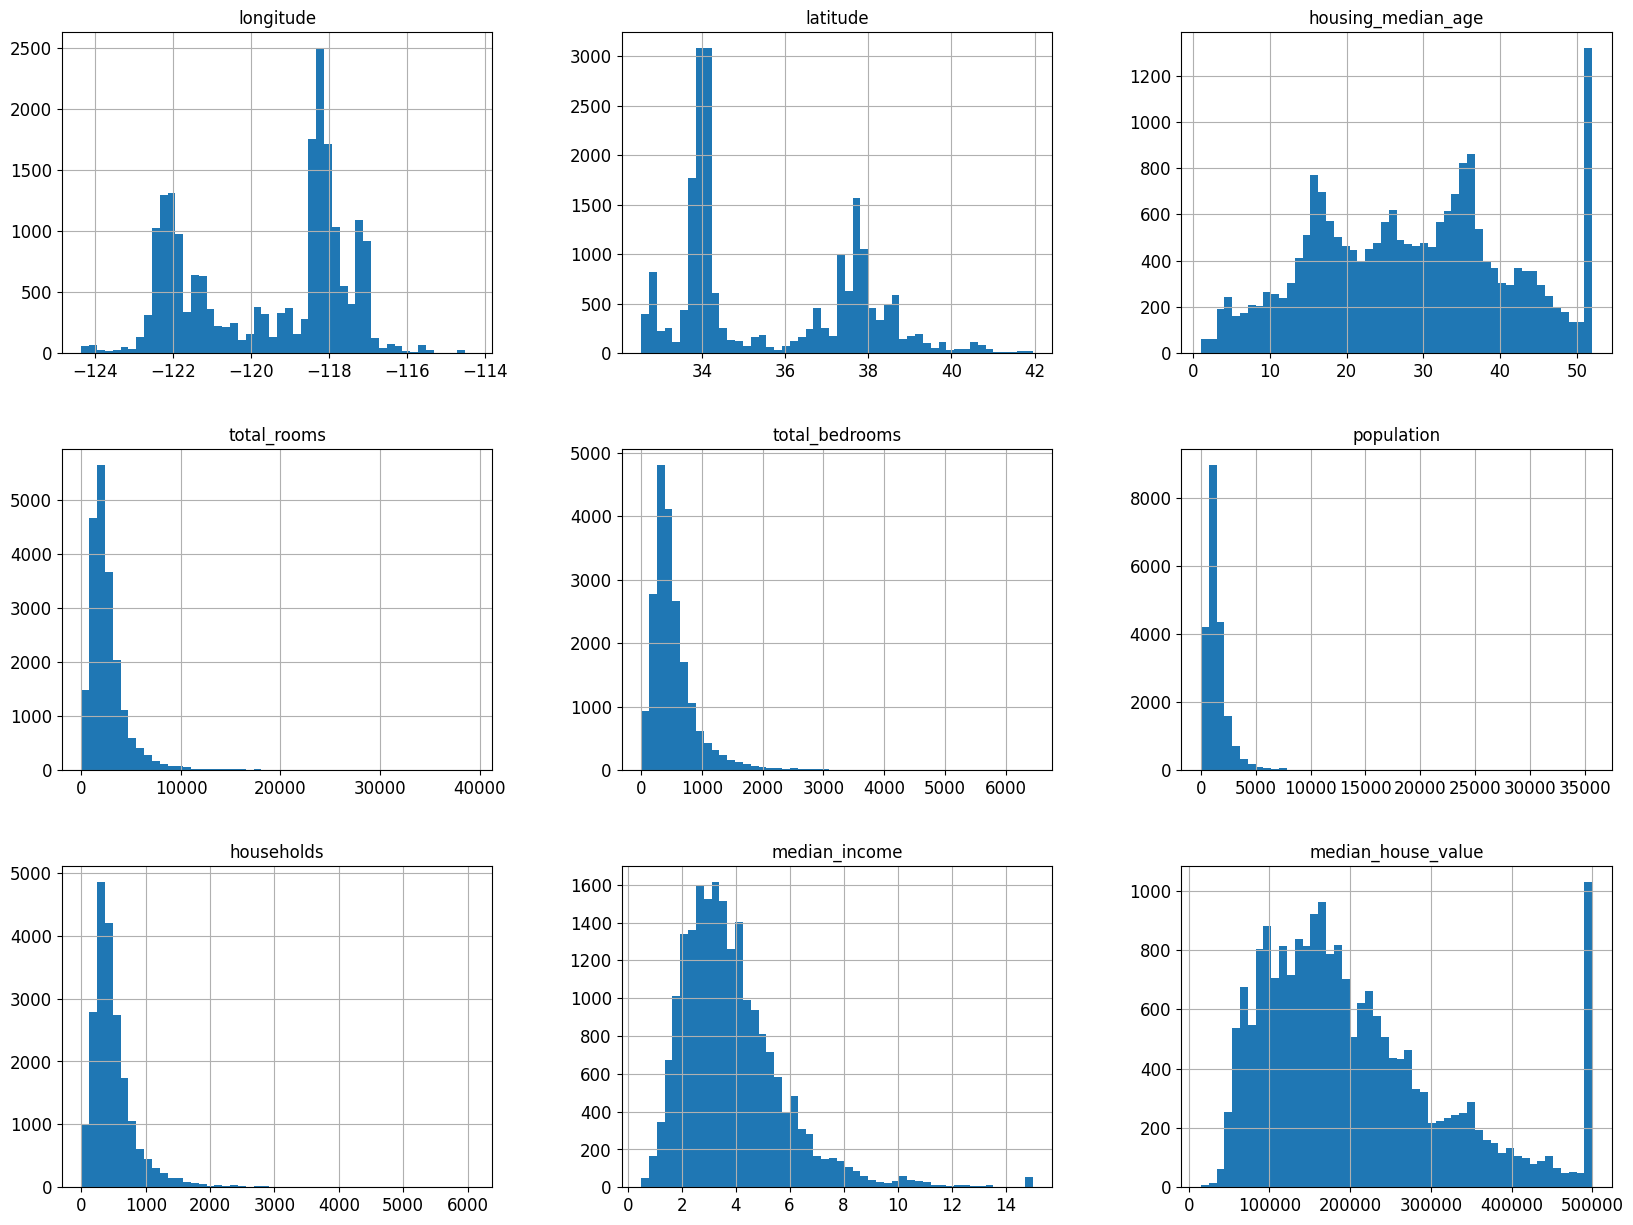

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt
dataset.hist(bins=50, figsize=(20, 15))

Observações encontradas:

* median_income (renda média) não parece estar expresso em dólares americanos, dê uma olhadinha na escala dos dados. Aqui precisamos falar de dados dimensionados!

* a variável median_house_value (nossa target) também parece estar limitada em casas até 500 mil dólares. Aqui seria interessante entender com o cliente se o mesmo deseja que o algoritmo ultrapasse esse limite ou não.

* podemos identificar bastante assimetria nos dados.

# Separando as bases em treino e teste


In [75]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(dataset, test_size=0.2, random_state = 7)

In [76]:
print(len(df_train), ' Treinamento + ', len(df_test), 'teste')

16512  Treinamento +  4128 teste


# Criando categorias de média de renda anual
Vamos supor que algum especialista da área de vendas de imóveis notificou que a média de renda anual é um atributo importante para colocar no modelo preditivo para estimar preços médios.

Quando dividimos o conjunto de treino e teste precisamos garantir que ambos sejam representativos com todos os valores de renda anual.Como a média de renda anual é um atributo numérico, que tal criar uma categoria de renda ?

<Axes: >

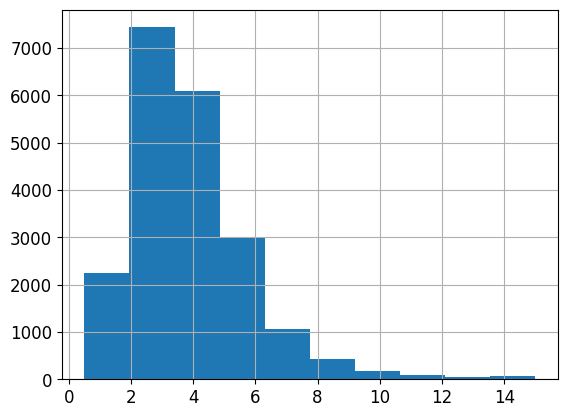

In [77]:
dataset['median_income'].hist()

In [78]:
# Divida por 1,5 para limitar o número de categorias de renda
# dividindo o valor da coluna "median_income" de cada entrada pelo valor 1,5 e, em seguida, arredondando o resultado para cima usando a função
# np.ceil() (da biblioteca NumPy). Isso cria uma nova coluna chamada "income_cat" no dataset que contém os valores das categorias de renda após
# a divisão e arredondamento.

dataset['income_cat'] = np.ceil(dataset["median_income"] / 1.5) #ceil arredonda valores para cima
# Rotule aqueles acima de 5 como 5.
# os valores na coluna "income_cat" que forem maiores ou iguais a 5 são substituídos por 5. Isso é feito usando a função .where() do pandas.
# Basicamente, se o valor em "income_cat" for menor que 5, ele permanece o mesmo; caso contrário, é substituído por 5.
dataset['income_cat'].where(dataset['income_cat'] < 5, 5.0) #, inplace=True nao funciona aqui mais

,income_cat
0,5.0
1,5.0
2,5.0
3,4.0
4,3.0
...,...
20635,2.0
20636,2.0
20637,2.0
20638,2.0


In [79]:
#cut do Pandas, que é comumente usada para dividir um conjunto de dados em intervalos discretos chamados de "bins" (intervalos ou faixas)
dataset['income_cat'] = pd.cut(dataset['median_income'],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf ],
                               labels=[1, 2, 3, 4, 5])

In [80]:
dataset['income_cat'].value_counts().sort_index()

,count
income_cat,
1,822
2,6581
3,7236
4,3639
5,2362


<Axes: >

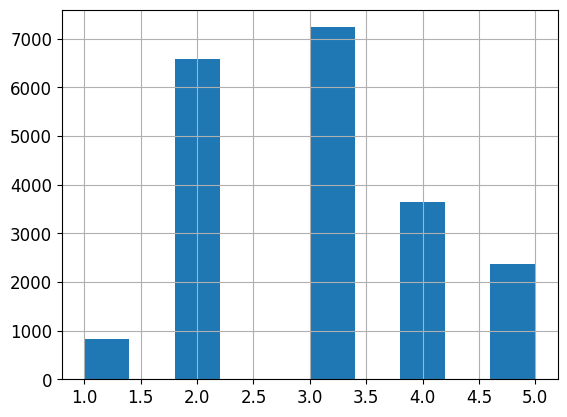

In [81]:
dataset['income_cat'].hist()

Resumindo, esse código está transformando valores contínuos de renda em categorias discretas, dividindo-os em intervalos específicos e arredondando-os para cima, garantindo que o número de categorias seja limitado e, finalmente, atribuindo rótulos numéricos a essas categorias.

Boa! Agora com as categorias criadas, vamos realizar a amostragem estratificada com base na categoria de renda!
Aqui usamos a StratifiedShuffleSlip para dividir a quantidade de categorias igualmente entre treino e teste, para nao gerar metricas incorretas. no for sendo split.split(X,y)

In [82]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(dataset, dataset['income_cat']):
  strat_train_set = dataset.loc[train_index]
  strat_test_set = dataset.loc[test_index]

In [83]:
#Aqui analisamos as proporsões em porcentagem
(strat_test_set['income_cat'].value_counts() / len(strat_test_set)) * 100

,count
income_cat,
3,35.053295
2,31.879845
4,17.635659
5,11.434109
1,3.997093


In [84]:
(strat_train_set['income_cat'].value_counts() / len(strat_train_set)) * 100

,count
income_cat,
3,35.059351
2,31.885901
4,17.629603
5,11.446221
1,3.978924


In [85]:
#Comparando com dataset original
(dataset['income_cat'].value_counts() / len(dataset)) * 100

,count
income_cat,
3,35.058140
2,31.884690
4,17.630814
5,11.443798
1,3.982558


Show! Depois de garantir que os valores médios de renda anual estão distribuídos de forma estratificada, podemos remover a coluna income_cat que utilizamos como variável auxiliar.
**Parâmetro	O que faz**
**"income_cat"**	O nome da coluna que será removida
**axis=1	Indica** que você quer remover uma coluna (e não uma linha)
**inplace=True**	Faz a remoção no próprio DataFrame, sem precisar reatribuir

A coluna income_cat é removida de ambos os conjuntos
A coluna income_cat foi criada apenas temporariamente para ajudar a fazer a estratificação (a divisão balanceada entre treino e teste).

⚙️ Depois que a divisão está feita, ela não faz parte dos dados originais do modelo — ela é uma coluna auxiliar.
Manter ela poderia viciar o modelo (dar informações que não deveriam ser usadas).

Por isso, depois da divisão, a gente descarta porque pegamos 80% dos dados para treino e 20% para teste mas dividimos igualmente a quantidade de categorias entre os dois modelos


In [86]:
# Removendo o income_cat das bases de treino e teste
# O uso do termo set_ é uma convenção para indicar que é uma variável temporária que itera sobre um conjunto de dados (um conjunto de treinamento ou um conjunto de teste).

for set_ in (strat_train_set, strat_test_set):
  set_.drop("income_cat", axis=1, inplace=True)

# Analisando dados geográficos

In [87]:
housing = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

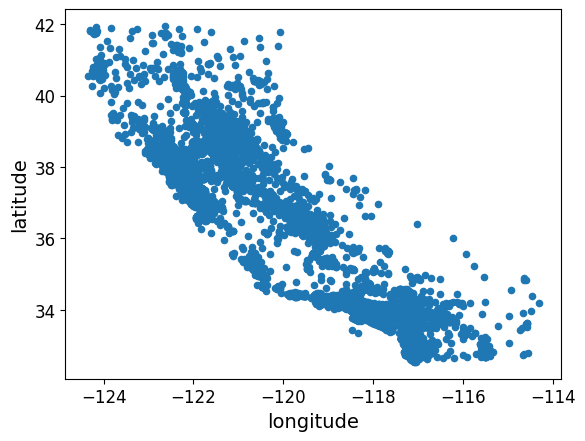

In [88]:
housing.plot(kind="scatter", x="longitude", y="latitude")

Vamos analisar a concentração de pontos

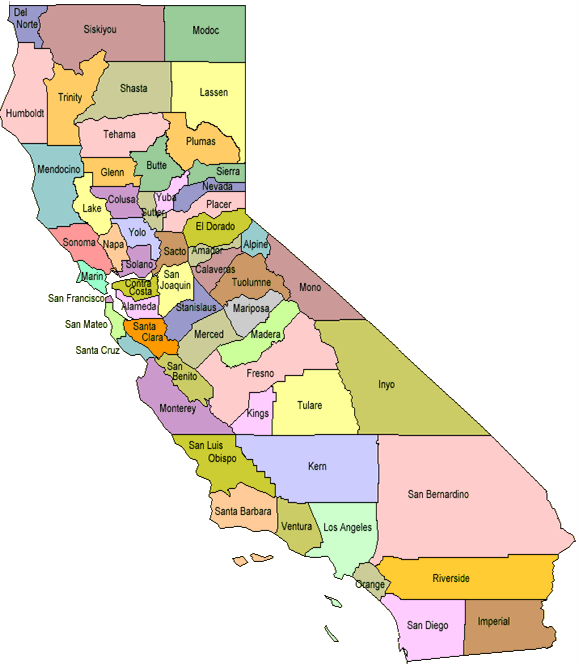

<Axes: xlabel='longitude', ylabel='latitude'>

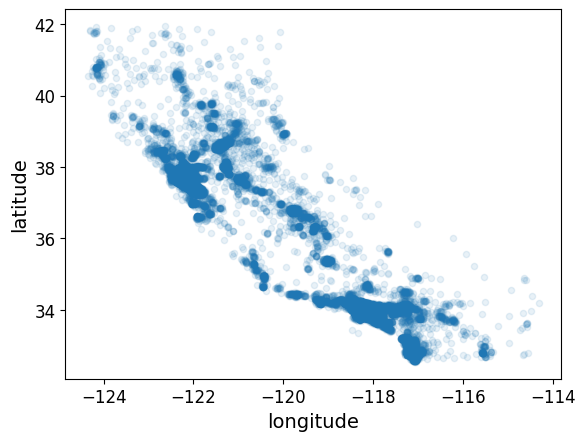

In [89]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

# Analisando preços imobiliários

**Esse código cria um gráfico de dispersão (scatter plot) que mostra:**

* onde cada bairro ou região está localizado (longitude e latitude),

* qual é o valor médio das casas em cada local (cor),

* e o tamanho da população (tamanho do ponto).

## 🧭 Visualização Geográfica dos Dados — Explicação do Código

O código abaixo cria um **gráfico de dispersão** (scatter plot) que mostra a distribuição geográfica dos dados,
onde cada ponto representa uma região do conjunto *housing* (ex: bairros da Califórnia).

O gráfico combina várias informações ao mesmo tempo:

- **Posição (longitude e latitude):** localização geográfica  
- **Cor:** valor médio das casas (`median_house_value`)  
- **Tamanho do ponto:** população (`population`)  
- **Transparência:** ajuda a visualizar áreas densas  

---

### 💻 Código

```python
housing.plot(kind="scatter",
             x="longitude",
             y="latitude",
             alpha=0.4,                           # transparência dos pontos
             s=housing["population"]/100,         # tamanho dos pontos proporcional à população
             label="population",                  # legenda
             figsize=(10,7),                      # tamanho do gráfico
             c="median_house_value",              # cor dos pontos = valor médio das casas
             cmap=plt.get_cmap("jet"),            # mapa de cores (azul → vermelho)
             colorbar=True,                       # adiciona a barra de cores
             sharex=False)                        # não compartilha eixo X (detalhe técnico)

plt.legend()  # mostra legenda

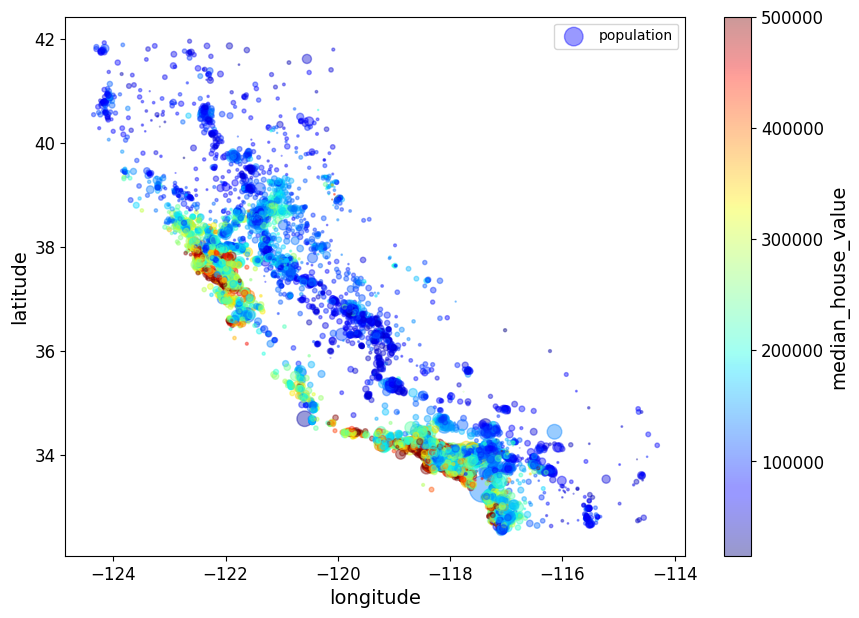

In [90]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()


#Buscando correlações

In [92]:
corr_matrix = housing.corr()

ValueError: could not convert string to float: 'INLAND'